## Decision Tree Classifier Implementation With Post Prunning And Preprunning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import load_iris



In [5]:
dataset=load_iris()

In [6]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
import seaborn as sns
df = sns.load_dataset('iris')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333  

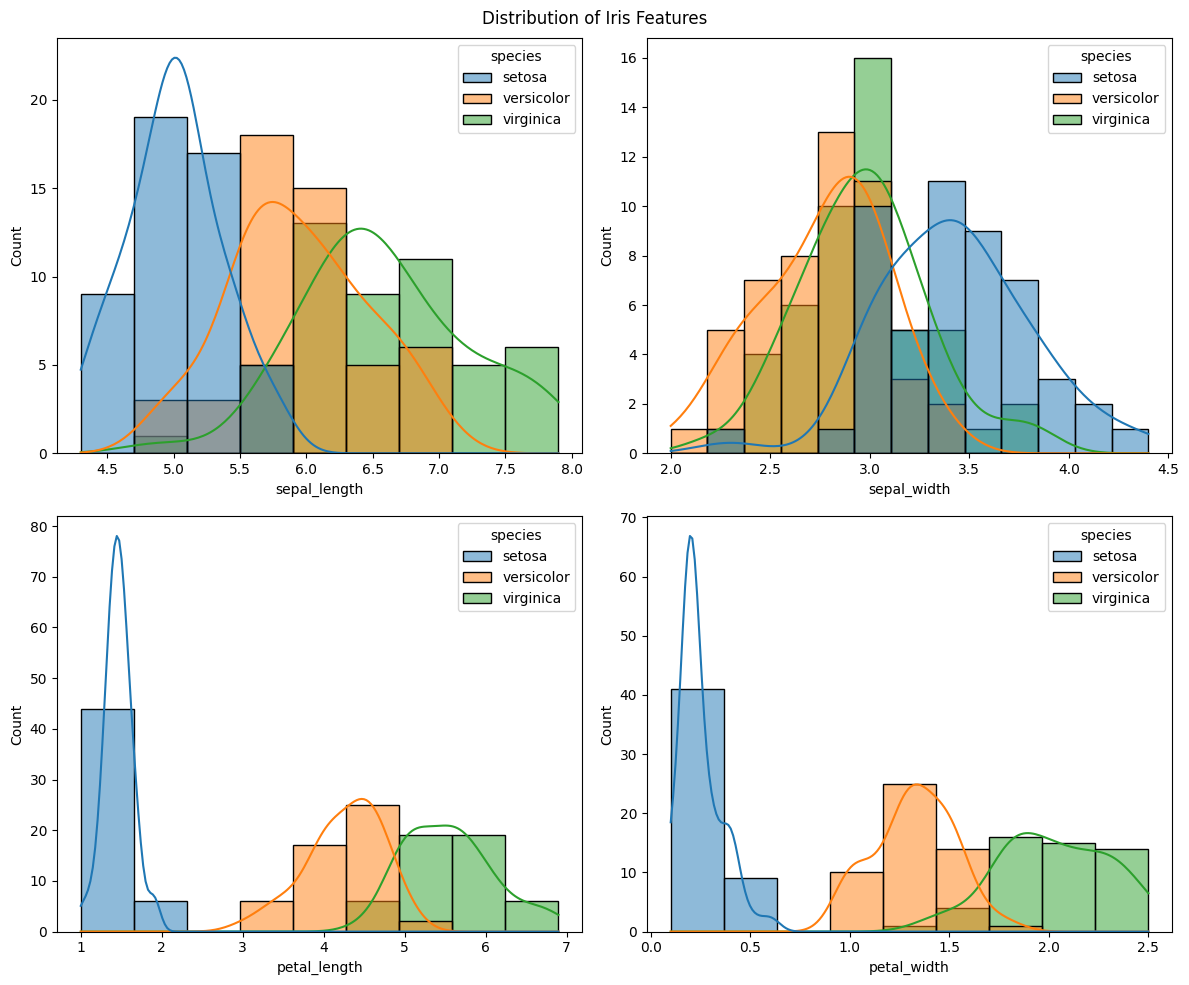

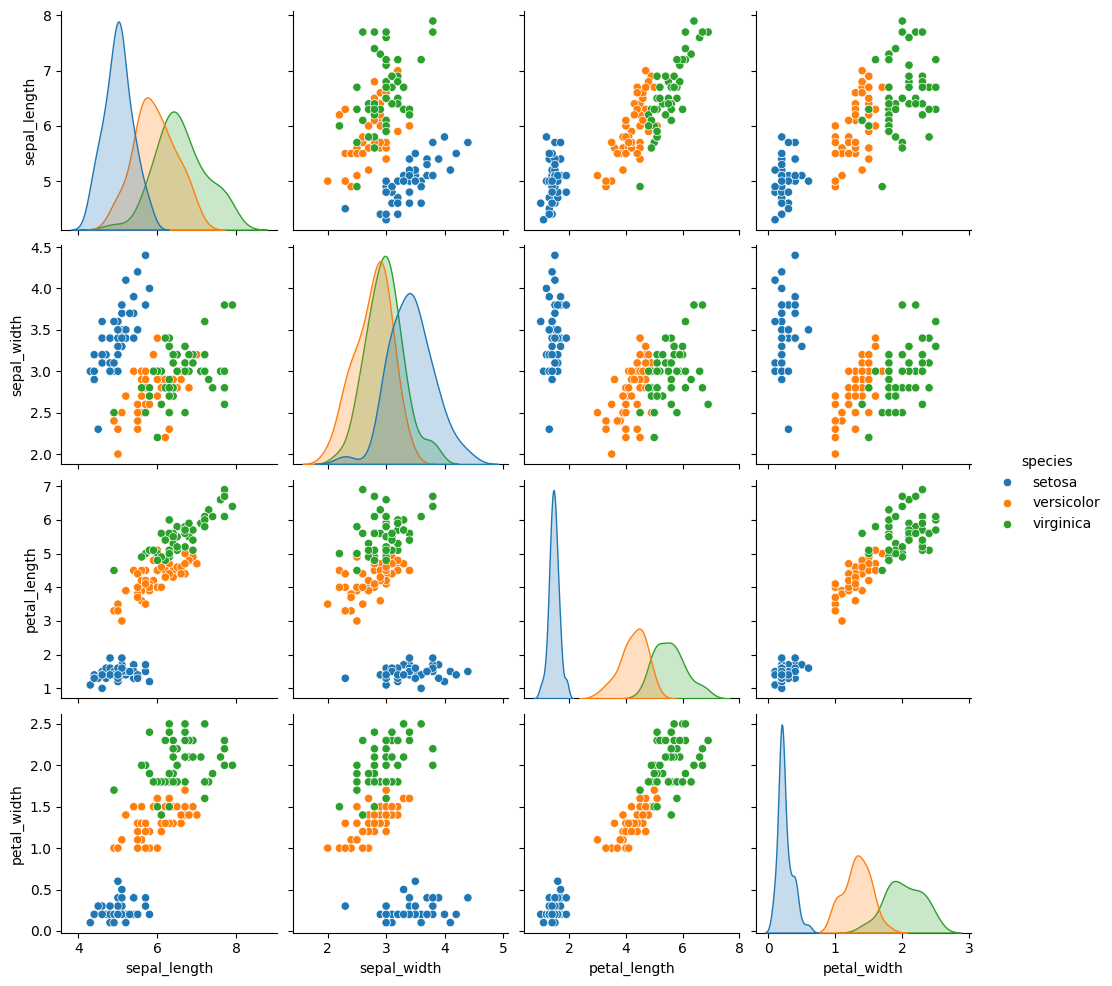

<Figure size 1200x600 with 0 Axes>

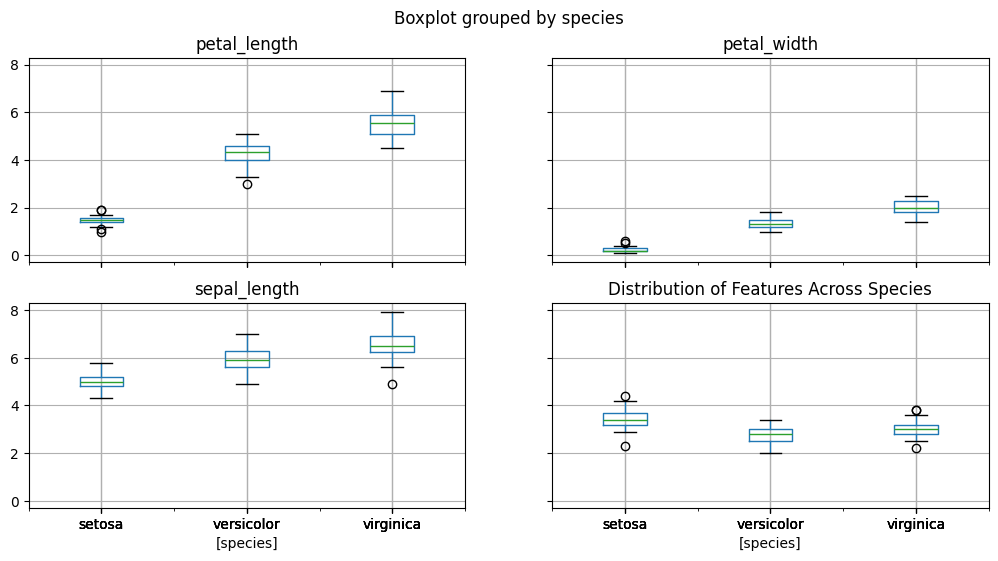

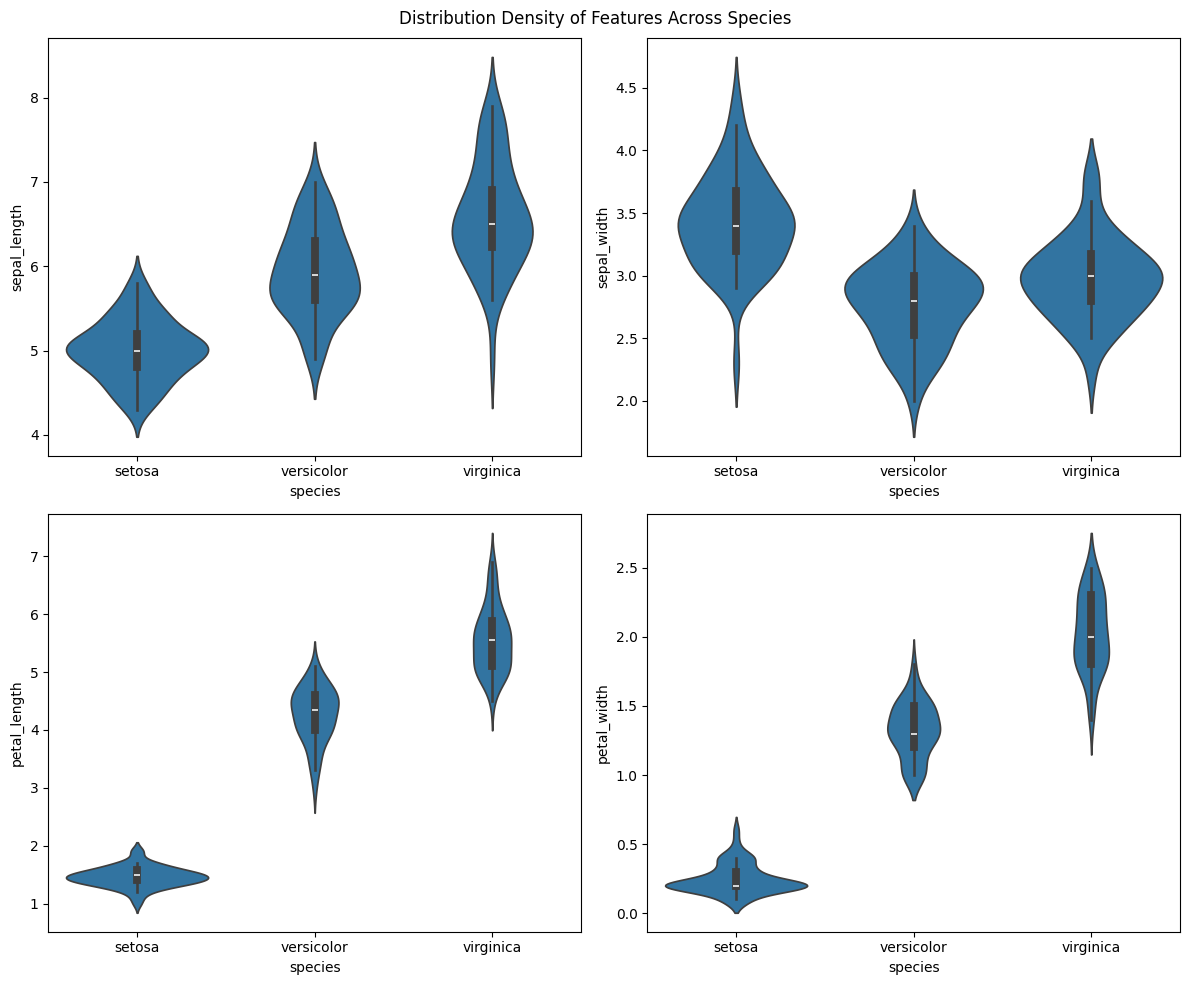

In [9]:
# Analyze the data and perform some Exploratory Data Analysis (EDA)

# Display basic information about the dataset
print(df.info())

# Show the first few rows of the dataset
print(df.head())

# Display summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Iris Features')

for i, feature in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=feature, hue='species', kde=True, ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()

# Create a pairplot to visualize relationships between features
sns.pairplot(df, hue='species')
plt.show()



# Box plot to visualize the distribution of features across species
plt.figure(figsize=(12, 6))
df.boxplot(by='species', figsize=(12, 6))
plt.title('Distribution of Features Across Species')
plt.show()

# Violin plot to show the distribution density of features across species
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution Density of Features Across Species')

for i, feature in enumerate(df.columns[:-1]):
    sns.violinplot(x='species', y=feature, data=df, ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()



In [10]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
X=df.iloc[:,:-1]
y=dataset.target

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)




In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)
